In [207]:
import kwargs as kwargs
import Funciones as m
import tensorflow as tf
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

testFotosYo = m.load_images_from_folder('C:/Users/Ignac/Desktop/Seminario/Fotos para reconocer/New folder', (64, 64),
                                        True)
fotosMias = m.load_images_from_folder('C:/Users/Ignac/Desktop/Seminario/Fotos para reconocer/Fotos mias', (64, 64),
                                      True)


In [208]:
# estos training sets no son arrays podria cambiar la funcion lo mejor seria cargalos directamente en hdf5
imagen_training_gente = m.load_images_from_folder('C:/Imagenes para ML/Gente/part1', (64, 64), 0)
imagen_test_gente = m.load_images_from_folder('C:/Imagenes para ML/Gente/test', (64, 64), 0)


In [209]:
fotosMiasArray = np.array(fotosMias[:])
fotosDeGente = np.array(imagen_training_gente[:])
m_train = fotosMiasArray.shape[0]

y_yo = np.ones((1, m_train))
y_no = np.zeros((1, fotosDeGente.shape[0]))
fotosMiasArray = fotosMiasArray.reshape(fotosMiasArray.shape[0], -1).T
fotosDeGente = fotosDeGente.reshape(fotosDeGente.shape[0], -1).T
train_set_y = np.append(y_yo, y_no)
print(train_set_y.shape)
train_set_x = np.append(fotosMiasArray, fotosDeGente, axis=1)
print(train_set_x.shape[0])
print(train_set_x.shape[1])

(1219,)
12288
1219


In [210]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
tf.compat.v1.layers.Dropout(
    rate=0.8, noise_shape=None, seed=None, name=None )
model.fit(train_set_x.T, train_set_y, epochs=200)


Epoch 1/200
39/39 [==============================] - 1s 6ms/step - loss: 1.7377 - accuracy: 0.6881
Epoch 2/200
39/39 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8539
Epoch 3/200
39/39 [==============================] - 0s 5ms/step - los

In [211]:
image_test = np.array(testFotosYo[:])
image2_test = np.array(imagen_test_gente[:])
print("*****el tamaño de la matriz  image_test  " + str(image_test.shape))
print("el tamaño de la matriz  image2_test" + str(image2_test.shape))
y_yo_test = np.ones((1, image_test.shape[0]))
y_no_test = np.zeros((1, image2_test.shape[0]))

image_test = image_test.reshape(image_test.shape[0], -1).T
print("el tamaño de la matriz  image_set es " + str(fotosMiasArray.shape))
image2_test = fotosDeGente.reshape(image2_test.shape[0], -1).T

test_set_y = np.append(y_yo_test, y_no_test)
print("el tamaño de la matriz test es " + str(image_test.shape) + "***" + str(image2_test.shape) +
      "train_set_x " + str(train_set_y.shape))

test_set_x = np.append(image_test, image2_test, axis=1)


*****el tamaño de la matriz  image_test  (45, 64, 64, 3)
el tamaño de la matriz  image2_test(811, 64, 64, 3)
el tamaño de la matriz  image_set es (12288, 408)
el tamaño de la matriz test es (12288, 45)***(12288, 811)train_set_x (1219,)


In [212]:
model.evaluate(test_set_x.T , test_set_y)

27/27 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.9007


[0.38167843222618103, 0.9007009267807007]

In [213]:
print(test_set_x.T.shape)
print(np.array(test_set_x[:, 1], ndmin=2).shape)

classifications = model.predict(np.array(test_set_x[:, 1], ndmin=2))
classifications = model.predict(test_set_x.T)

(856, 12288)
(1, 12288)


(16, 64, 64, 3)
Probabilidad por cada foto: 
[[9.9689579e-01]
 [1.5158951e-03]
 [4.8243999e-04]
 [3.6625862e-03]
 [1.6152897e-09]
 [9.9929166e-01]
 [2.7664772e-01]
 [4.5508146e-04]
 [9.9998534e-01]
 [9.9980569e-01]
 [1.8636018e-02]
 [9.4115007e-01]
 [9.9998581e-01]
 [9.9962252e-01]
 [9.9480522e-01]
 [9.9952328e-01]]
y = True" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = False" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)
y = True" picture.shape:(64, 64, 3)


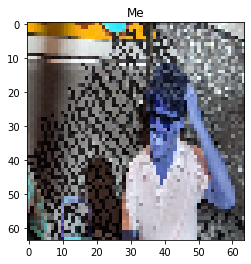

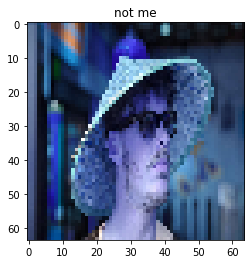

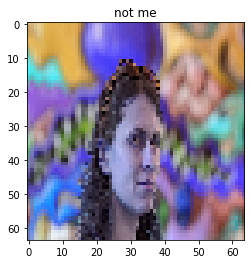

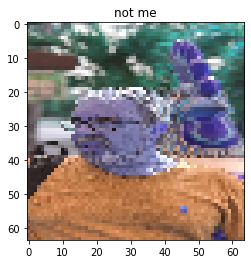

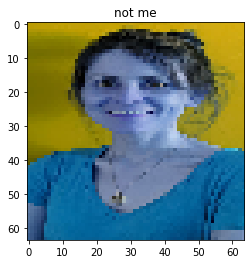

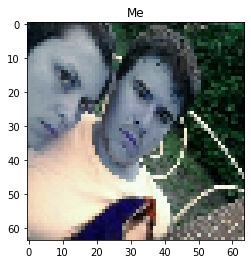

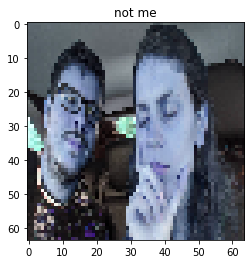

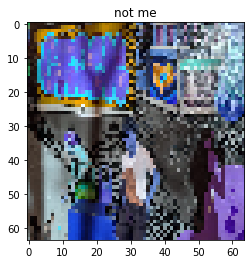

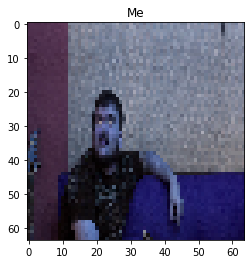

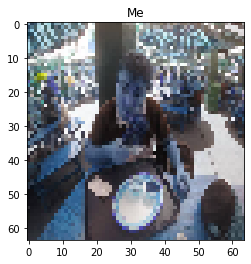

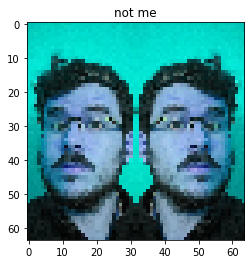

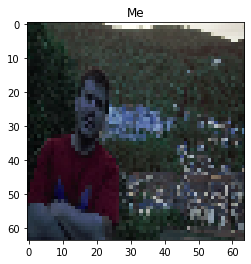

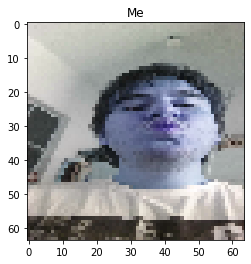

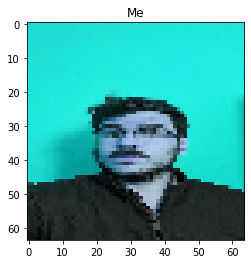

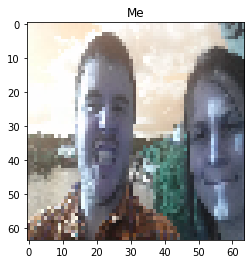

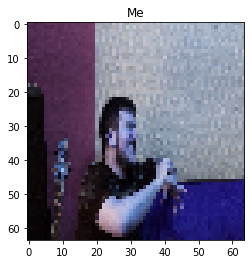

In [214]:
imagenes = m.load_images_from_folder('C:/Users/Ignac/Desktop/Seminario/Fotos para reconocer/Predecir', (64, 64), 0)

fotosPredecir = np.array(imagenes[:])
print(fotosPredecir.shape)
fotosPredecir = fotosPredecir.reshape(fotosPredecir.shape[0], -1).T

count = 0
#########testing with more photos
classifications = model.predict(fotosPredecir .T)
print("Probabilidad por cada foto: ")
print(classifications)
for i in range(fotosPredecir.shape[1]):
    y_resultado = model.predict(np.array(fotosPredecir[:, i], ndmin=2))>0.7 # fuerzo a que no aparezca el tuplet
    reconstruida = np.array(fotosPredecir[:, i], ndmin=2).T.reshape(64, 64, 3)  # reconstruyo la imagen orignal

    #classifications = model.predict(np.array(fotosPredecir[:, 1], ndmin=2))

    #print(classifications[0])

    plt.title({True: "Me", False: "not me"}[np.squeeze(y_resultado) == True])
    #plt.imshow(reconstruida
    plt.imshow(np.array(imagenes)[i,:,:,:])
    #plt.imshow((reconstruida* 255).astype(np.uint8))
    plt.show()
    print("y = " + str(np.squeeze(y_resultado)) + "" + "\" picture." + "shape:" + str(reconstruida.shape))
    count += 1 if str(np.squeeze(y_resultado)) == '1.0' else count + 0
